In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydicom
import os
import albumentations as A
import torch

train = pd.read_csv("../input/osic-pulmonary-fibrosis-progression/train.csv")
test = pd.read_csv("../input/osic-pulmonary-fibrosis-progression/test.csv")

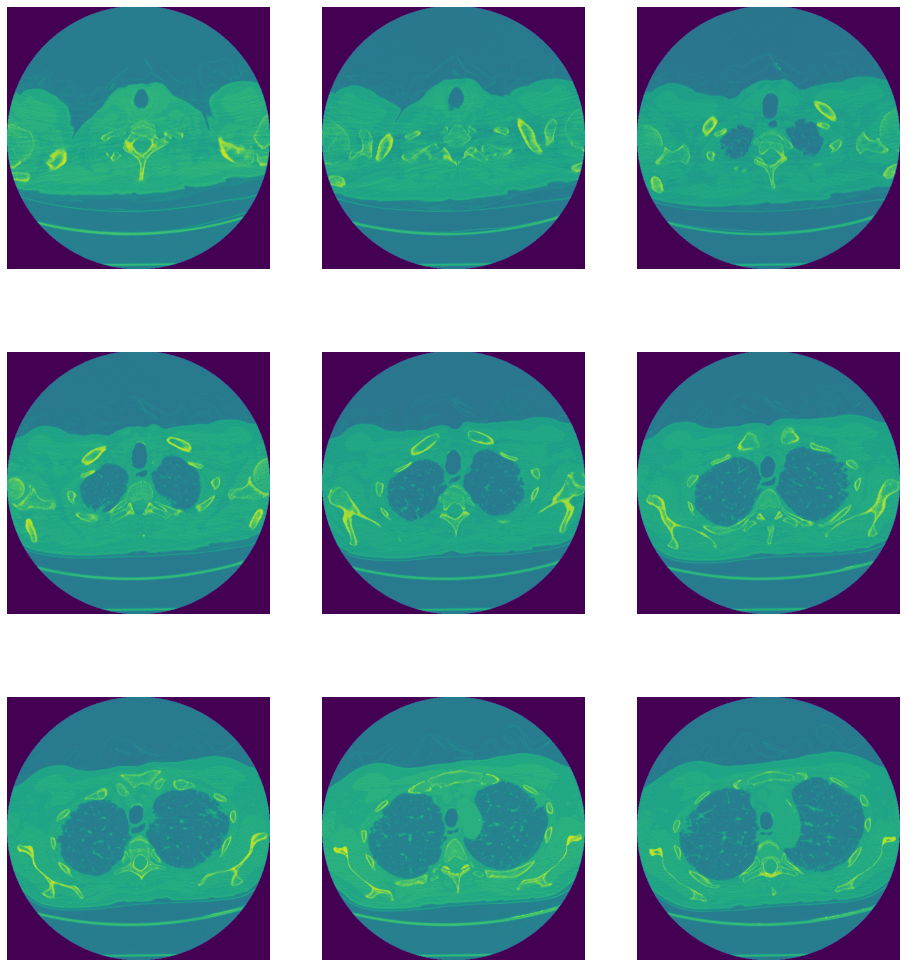

In [2]:
def show_images(images, read_region = (1780, 1950)):
    f, ax = plt.subplots(3,3,figsize = (16, 18))
    for i, image in enumerate(images):
        image_path = os.path.join("../input/osic-pulmonary-fibrosis-progression", "train/ID00007637202177411956430", image + ".dcm")
        image = pydicom.dcmread(image_path)
        ax[i // 3, i % 3].imshow(image.pixel_array)
        ax[i // 3, i % 3].axis('off')
    plt.show()

images = ['1','2','3',
          '4','5','6',
          '7','8','9']
show_images(images)

In [3]:
import cv2
def show_images(images, aug_dict, read_region = (1780, 1950)):
    f, axes = plt.subplots(len(aug_dict), 6, figsize = (20, 2 * len(aug_dict)),squeeze = False)
    for i, im in enumerate(images):
        for i, (key, aug) in enumerate(aug_dict.items()):
            for j in range(6):
                ax = axes[i, j]
                if j == 0:
                    ax.text(0.5, 0.5,key, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 15)
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
                    ax.axis('off')
                else:
                    image_path = "../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/" + str(j) + ".dcm"
                    image = pydicom.dcmread(image_path).pixel_array
                    
                    if aug is not None:
                        image = aug(image = image)['image']
                    ax.imshow(image, cmap = 'bone')
        plt.tight_layout()
        plt.show()
        plt.close()
    plt.show()

images = ['1', '19', '13', '11', '5']
augs = {'Original': None,
      'Blur':A.Blur(p = 1.0),
      'MedianBlur':A.MedianBlur(blur_limit = 5, p = 1.0),
      'GaussianBlur':A.GaussianBlur(p = 1.0),
      'MotionBlur': A.MotionBlur(p = 1.0)
      }
show_images(images, augs)
  

NameError: name 'augs' is not defined

In [ ]:
augs = {'Origin':None,
       'GridDropout':A.GridDropout(p = 1.0)}
show_images(images, augs)

In [ ]:
augs = {'Original':None,
       'RandomCrop' : A.RandomCrop(height = 64, width = 64, p =1.0),
       'CenterCrop':A.CenterCrop(height = 64, width = 64, p = 1.0),
       'RandomSizedCrop':A.RandomSizedCrop((90, 100), 64,64)}
show_images(images, augs)

In [ ]:
augs = {'Original':None,
       'RandomRotate90':A.RandomRotate90(p = 1.0),
       'ShiftScaleRotate':A.ShiftScaleRotate(p = 1.0),
       'Rotate':A.Rotate()}
show_images(images, augs)

In [ ]:
def show_imagesuint8(images, aug_dict, read_region = (1780, 1950)):
    f, axes = plt.subplots(len(aug_dict), 6, figsize =(20, 2 * len(aug_dict)), squeeze = False)
    for i, im in enumerate(images):
        for i, (key, aug) in enumerate(aug_dict.items()):
            for j in range(6):
                ax = axes[i, j]
                if j == 0:
                    ax.text(0.5, 0.5, key, horizontalalignment = 'center', verticalalignment = 'center', fontsize = 15)
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
                    ax.axis('off')
                else:
                    image_path = "../input/osic-pulmonary-fibrosis-progression/train/ID00007637202177411956430/"+str(j)+'.dcm'
                    image = pydicom.dcmread(image_path).pixel_array.astype('uint8')
                    if aug is not None:
                        image = aug(image = image)['image']
                    ax.imshow(image, cmap = 'bone')
        plt.tight_layout()
        plt.show()
        plt.close()
augs = {'Original':None,
       'Solarize':A.Solarize(p = 1.0),
       'Posterize':A.Posterize(p = 1.0),
       'Equalize':A.Equalize(),
       'Downscale':A.Downscale()}
show_imagesuint8(images, augs)

                    

In [ ]:
augs = {'Original':None,
       "GaussNoise":A.GaussNoise(p = 1.0)}
show_imagesuint8(images, augs)